# Спрос на рейсы авиакомпании

### Описание проекта
Вы аналитик российской авиакомпании F9, которая выполняет внутренние пассажирские перевозки. Для развития компании важно понять предпочтения пользователей, покупающих билеты на разные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### Описание данных
База данных об авиаперевозках состоит из нескольких таблиц.

Таблица `airports` — информация об аэропортах:
* `airport_code` — трёхбуквенный код аэропорта,
* `airport_name` — название аэропорта,
* `city` — город,
* `timezone` — временная зона.

Таблица `aircrafts` — информация о самолётах:
* `aircraft_code` — код модели самолёта,
* `model` — модель самолёта,
* `range` — дальность полёта.

Таблица `tickets` — информация о билетах:
* `ticket_no` — уникальный номер билета,
* `passenger_id` — персональный идентификатор пассажира,
* `passenger_name` — имя и фамилия пассажира.

Таблица `lights` — информация о рейсах:
* `flight_id` — уникальный идентификатор рейса,
* `departure_airport` — аэропорт вылета,
* `departure_time` — дата и время вылета,
* `arrival_airport` — аэропорт прилёта,
* `arrival_time` — дата и время прилёта,
* `aircraft_code` — id самолёта.

Таблица `ticket_flights` — стыковая таблица «рейсы-билеты»
* `ticket_no` — номер билета,
* `flight_id` — идентификатор рейса.

Таблица `festivals` — информация о фестивалях
* `festival_id` — уникальный номер фестиваля,
* `festival_date` — дата проведения фестиваля,
* `festival_city` — город проведения фестиваля,
* `festival_name` — название фестиваля.

### Схема таблиц

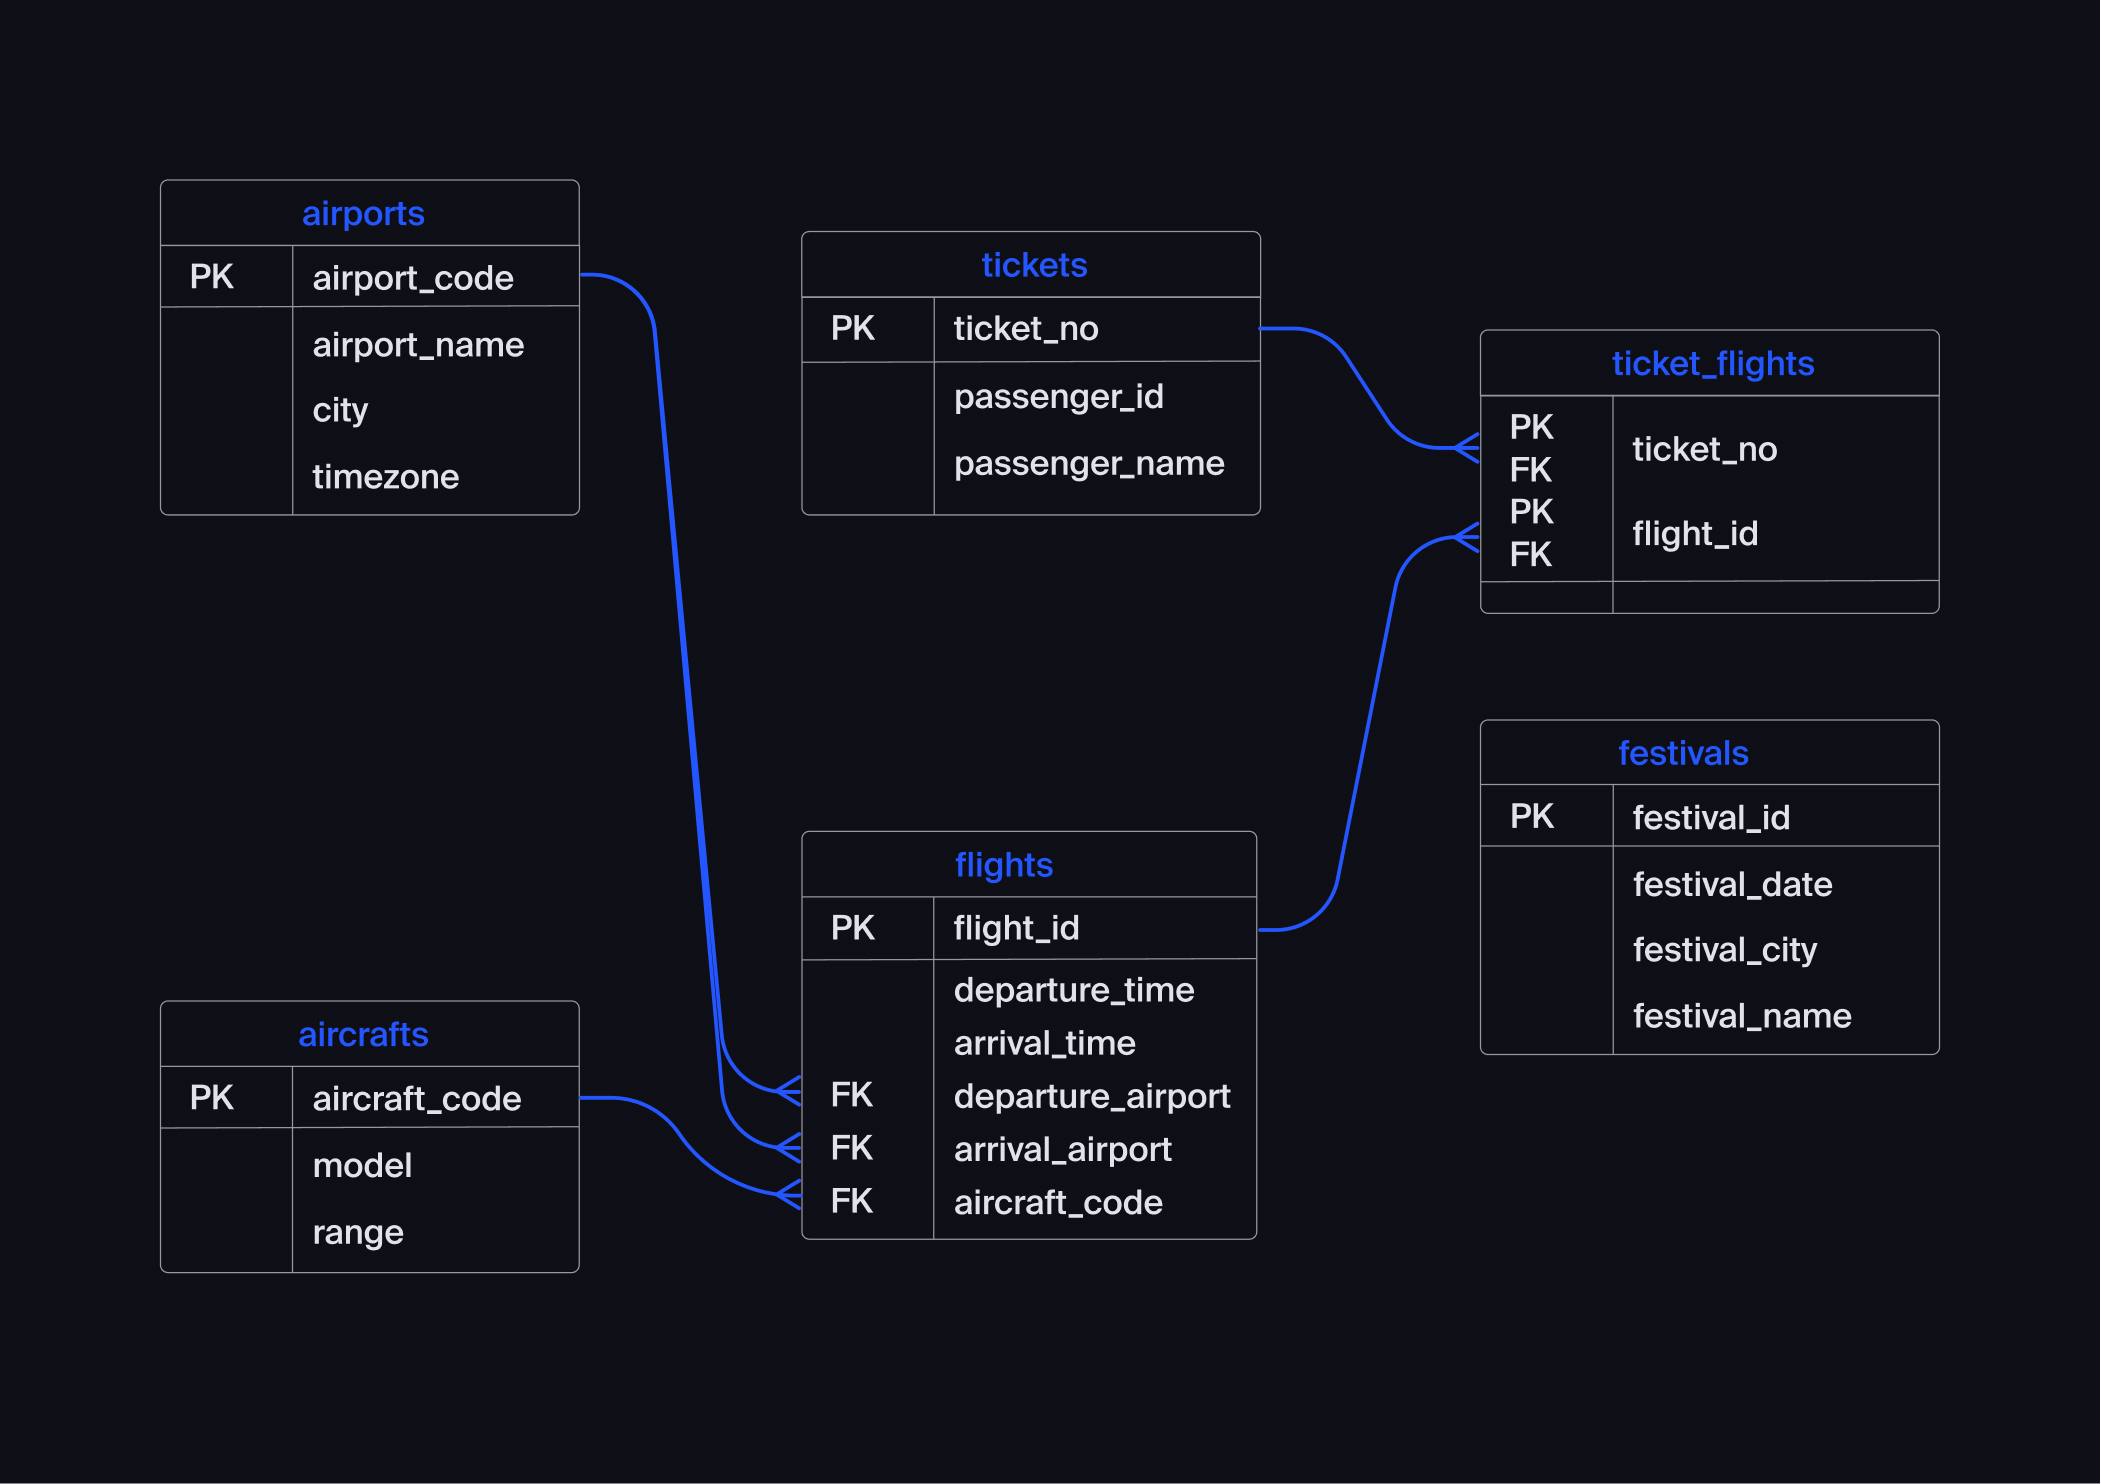

## 1. Работа с базой

Менеджер авиаперевозчика готовит исследование. Он хочет выявить связь между числом полётов, типом самолётов и календарём музыкальных фестивалей. Помогите ему получить необходимые данные.

1. Найдём количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года.

**Код**:
```
SELECT
    aircrafts.model AS model,
    COUNT(flights.flight_id) AS flight_amount
FROM
    (
        flights
        INNER JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code
    )
WHERE
    EXTRACT('MONTH' FROM flights.departure_time) = '09'
    AND EXTRACT('YEAR' FROM flights.departure_time) = '2018'
GROUP BY
    model
```
**Результат**:

<div style="float: left;">

|MODEL|FLIGHT_AMOUNT|
|---|---|
|Airbus A319-100|607|
|Airbus A321-200|960|
|Boeing 737-300|630|
|Boeing 767-300|600|
|Boeing 777-300|300|
|Bombardier CRJ-200|4446|
|Cessna 208 Caravan|4557|
|Sukhoi SuperJet-100|4185|
    
</div>

2. Посчитаем отправленные в сентябре рейсы самолётов следующих моделей:
* Boeing,
* Airbus,
* другие (“other”).

**Код**:
```
SELECT
    CASE
        WHEN aircrafts.model LIKE 'Airbus%' THEN 'Airbus'
        WHEN aircrafts.model LIKE 'Boeing%' THEN 'Boeing'
        ELSE 'other'
    END AS model,
    COUNT(flights.flight_id) AS flights_amount
FROM
    (
        flights
        INNER JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code
    )
WHERE
    EXTRACT('MONTH' FROM flights.departure_time) = '09'
GROUP BY
    CASE
        WHEN aircrafts.model LIKE 'Airbus%' THEN 'Airbus'
        WHEN aircrafts.model LIKE 'Boeing%' THEN 'Boeing'
        ELSE 'other'
    END
```
**Результат**:

<div style="float: left;">

|MODEL|FLIGHTS_AMOUNT|
|---|---|
|Airbus|1567|
|Boeing|1530|
|other|13188|

</div>

3. Посчитаем среднее количество прибывающих рейсов в день для каждого города за август 2018 года.

**Код**:
```
SELECT
    subq.city AS city,
    AVG(subq.flights_count) AS average_flights
FROM
    (
        SELECT
            airports.city AS city,
            EXTRACT('DAY' FROM flights.arrival_time),
            COUNT(*) AS flights_count
        FROM
            (
                flights
                INNER JOIN airports ON flights.arrival_airport = airports.airport_code
            )
        WHERE
            EXTRACT('MONTH' FROM flights.arrival_time) = '08'
            AND EXTRACT('YEAR' FROM flights.arrival_time) = '2018'
        GROUP BY
            city,
            EXTRACT('DAY' FROM flights.arrival_time)
    ) AS subq
GROUP BY
    city
```
**Результат**:

<div style="float: left;">

|CITY|AVERAGE_FLIGHTS|
|---|---|
|Абакан|3.87097|
|Анадырь|1|
|Анапа|2.16129|
|Архангельск|5.35484|
|Астрахань|2.45161|
|Барнаул|2.6129|
|Белгород|6|
|Белоярский|2|
|Благовещенск|1|
|Братск|1|
|Брянск|10|
|Бугульма|3|
|Владивосток|3|
|Владикавказ|2|
|Волгоград|5.12903|
|Воркута|4.58065|
|Воронеж|2|
|Геленджик|2.59091|
|Горно-Алтайск|1.3871|
|Грозный|1.12903|
|Екатеринбург|11.3226|
|Иваново|1|
|Ижевск|1|
|Иркутск|6.03226|
|Йошкар-Ола|4.29032|
|Казань|7.74194|
|Калининград|2.58065|
|Калуга|2.03226|
|Кемерово|2|
|Киров|6|
|Когалым|3.16129|
|Комсомольск-на-Амуре|1|
|Краснодар|3.90323|
|Красноярск|11.5806|
|Курган|3.41935|
|Курск|2.29032|
|Кызыл|1.27778|
|Липецк|1.29412|
|Магадан|1.35714|
|Магнитогорск|4|
|Махачкала|3.29032|
|Минеральные Воды|3.41935|
|Мирный|6.29032|
|Москва|129.774|
|Мурманск|2|
|Надым|2.29032|
|Нальчик|3|
|Нарьян-Мар|2.6129|
|Нерюнгри|2.58065|
|Нефтеюганск|1|
|Нижневартовск|3.12903|
|Нижнекамск|3.74194|
|Нижний Новгород|5.87097|
|Новокузнецк|6.03226|
|Новосибирск|17.3226|
|Новый Уренгой|8.29032|
|Норильск|2.29032|
|Ноябрьск|3|
|Нягань|1|
|Омск|3.29032|
|Оренбург|5|
|Орск|1.59091|
|Пенза|4|
|Пермь|10.129|
|Петрозаводск|5.87097|
|Петропавловск-Камчатский|1|
|Псков|1.54839|
|Ростов-на-Дону|10.1935|
|Салехард|2|
|Самара|3|
|Санкт-Петербург|31.1613|
|Саранск|2|
|Саратов|4|
|Советский|9|
|Сочи|9.6129|
|Ставрополь|2|
|Стрежевой|1|
|Сургут|8.74194|
|Сыктывкар|4.12903|
|Тамбов|4|
|Томск|4.19355|
|Тюмень|6.96774|
|Удачный|3|
|Улан-Удэ|1.6087|
|Ульяновск|9.58065|
|Урай|2|
|Усинск|1|
|Усть-Илимск|2.87097|
|Усть-Кут|1|
|Уфа|6.29032|
|Ухта|3|
|Хабаровск|6.54839|
|Ханты-Мансийск|8.41935|
|Чебоксары|5|
|Челябинск|6.70968|
|Череповец|2.16129|
|Чита|1.58065|
|Элиста|4.87097|
|Южно-Сахалинск|4.29032|
|Якутск|2.74194|
|Ярославль|1.32258|

</div>

4. Установим фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили.

**Код**:
```
SELECT
    festival_name,
    EXTRACT('WEEK' FROM festival_date) AS festival_week
FROM
    festivals
WHERE
    festival_date BETWEEN '2018-07-23' AND '2018-09-30'
    AND festival_city = 'Москва'
GROUP BY
    festival_name,
    EXTRACT('WEEK' FROM festival_date)
```
**Результат**:

<div style="float: left;">

|FESTIVAL_NAME|FESTIVAL_WEEK|
|---|---|
|Park Live|30|
|Видфест|36|
|Пикник Афиши|31|

</div>

5. Для каждой недели с 23 июля по 30 сентября 2018 года посчитаем билеты, которые купили на рейсы в Москву (номер недели `week_number` и количество билетов `ticket_amount`).

**Код**:
```
SELECT
    base.week_number,
    base.ticket_amount,
    EXTRACT(WEEK FROM fest.festival_date) AS festival_week,
    fest.festival_name
FROM
    (SELECT
        EXTRACT(WEEK FROM fl.arrival_time) AS week_number,
        COUNT(t_f.ticket_no) AS ticket_amount
    FROM
        (SELECT
            flights.flight_id,
            flights.arrival_time :: date
         FROM
             flights JOIN
             airports  ON
             flights.arrival_airport = airports.airport_code
         WHERE
             airports.city = 'Москва') AS fl JOIN
        ticket_flights AS t_f ON
        t_f.flight_id = fl.flight_id
    WHERE
        fl.arrival_time BETWEEN '23-07-2018' AND '30-09-2018'    
    GROUP BY
        EXTRACT(WEEK FROM fl.arrival_time)) AS base LEFT JOIN
    (SELECT
        festivals.festival_id,
        festivals.festival_date,
        festivals.festival_name
     FROM
         festivals
     WHERE festivals.festival_date BETWEEN '23-07-2018' AND '30-09-2018' AND
     festivals.festival_city = 'Москва') as fest ON
    base.week_number = EXTRACT(WEEK FROM fest.festival_date)
GROUP BY
    base.week_number,
    base.ticket_amount,
    festival_week,
    fest.festival_name
```
**Результат**:

<div style="float: left;">

|WEEK_NUMBER|TICKET_AMOUNT|FESTIVAL_WEEK|FESTIVAL_NAME|
|---|---|---|---|
|35|51360|nan||
|38|51518|nan||
|34|51492|nan||
|31|51034|31|Пикник Афиши|
|30|43568|30|Park Live|
|37|51670|nan||
|33|51378|nan||
|32|51675|nan||
|39|51623|nan||
|36|51386|36|Видфест|

</div>

## 2. Аналитика

### Описание данных
У нас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

`query_1.csv` — результат первого запроса. В нём содержится такая информация:
* *model* — модель самолета;
* *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

`query_3.csv` — результат третьего запроса. В нём содержится такая информация:
* *city* — город;
* *average_flights* — среднее количество рейсов, прибывающих в город (city) за день в сентябре 2018 года.

Импортируем необходимые библиотеки.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns


Загрузим исходные данные.

In [2]:
query_1 = pd.read_csv('query_1.csv')
query_3 = pd.read_csv('query_3.csv')

Выведем первые пять строк таблиц, чтобы удостовериться в корректности загрузки.

In [3]:
query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Обе таблицы отображаются корректно.

Изучим таблицы и их типы данных.

In [5]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропусков нет, типы данных впорядке.

Проверим на дубликаты.

In [11]:
print('В таблице query_1', query_1.duplicated().sum(), 'дубликатов.')
print('В таблице query_3', query_3.duplicated().sum(), 'дубликатов.')

В таблице query_1 0 дубликатов.
В таблице query_3 0 дубликатов.


Выберем топ 10 городов по количеству рейсов.

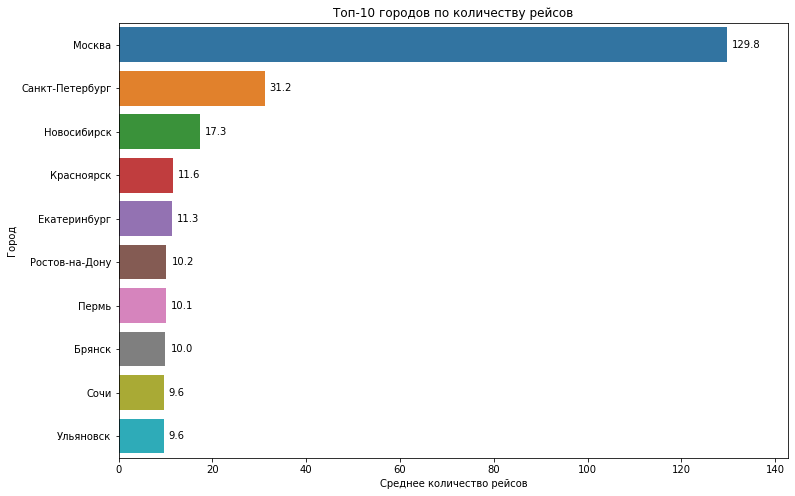

In [18]:
def add_value_labels(ax, decimals=1, spacing=5):
    """
    Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    rects = ax.patches
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = ("{:." + str(decimals) + "f}").format(x_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha                       # Horizontally align label differently for
        )                               # positive and negative values.

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='average_flights',
    y='city',
    data=query_3.sort_values(by='average_flights', ascending=False).head(10)
)
plt.title('Топ-10 городов по количеству рейсов')
plt.xlabel('Среднее количество рейсов')
plt.xlim((0, query_3['average_flights'].max()*1.1))
plt.ylabel('Город')
add_value_labels(ax)

plt.show()

Видно, что больше всего полетов в среднем совершается в города-миллионники (Москва, Санкт-Петербург и др.), так как они являются центрами притяжения как в сфере работы, так и досуга, кроме того, они являются крупными транспортными узлами.

Построим график моделей самолётов и количество совершённых рейсов.

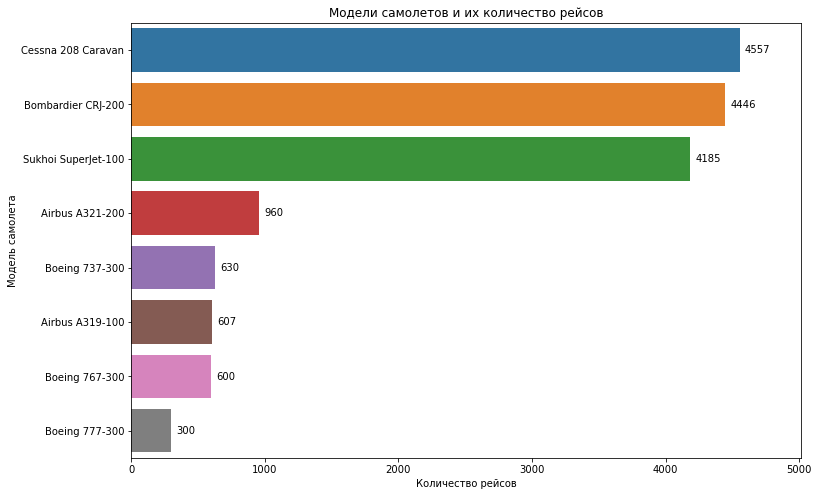

In [19]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='flights_amount',
    y='model',
    data=query_1.sort_values(by='flights_amount', ascending=False)
)
plt.title('Модели самолетов и их количество рейсов')
plt.xlabel('Количество рейсов')
plt.xlim((0, query_1['flights_amount'].max()*1.1))
plt.ylabel('Модель самолета')
add_value_labels(ax, decimals=0)
plt.show()

Больше всего полетов у небольших самолётов местного сообщения таких как Cessna 208 Caravan и Bombardier CRJ-200, а также ближнемагистрального самолёта Sukhoi SuperJet-100.

Построим график всех городов с количеством рейсов.

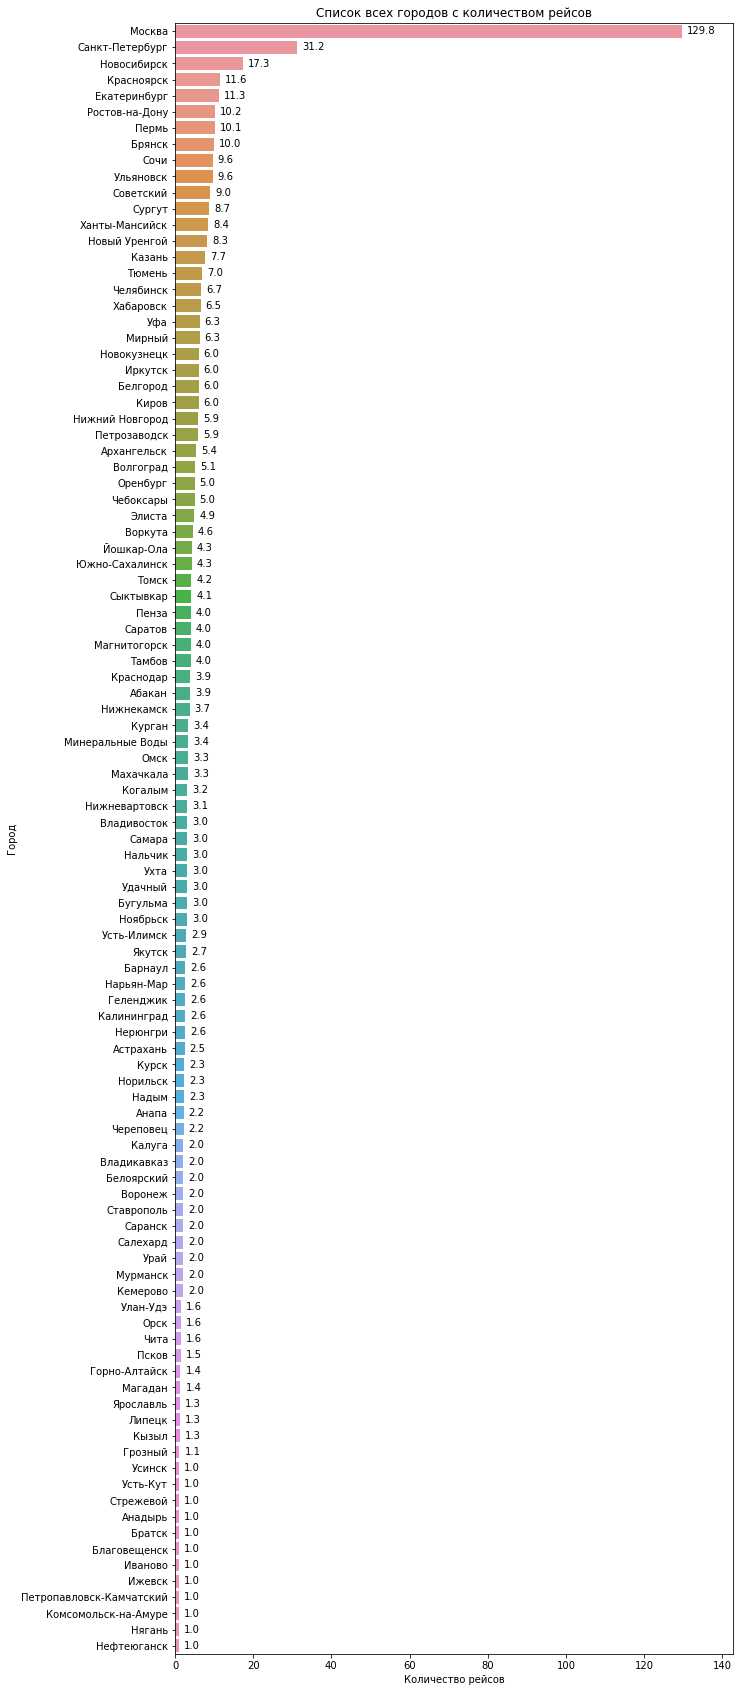

In [20]:
plt.figure(figsize=(10, 30))
ax = sns.barplot(
    x='average_flights',
    y='city',
    data=query_3.sort_values(by='average_flights', ascending=False)
)
plt.title('Список всех городов с количеством рейсов')
plt.xlabel('Количество рейсов')
plt.xlim((0, query_3['average_flights'].max()*1.1))
plt.ylabel('Город')
add_value_labels(ax)
plt.show()

## Вывод
Топ-3 городов с наибольшим количеством авиарейсов:
- Москва,
- Санкт-Петербург,
- Новосибирск.

Топ-3 городов с наименьшим количеством авиарейсов:
- Нефтеюганск,
- Нягань,
- Комсомольск-на-Амуре.

Чаще всего летают самолеты малой авиации:
- Cessna 208 Caravan,
- Bombardier CRJ-200,
- Sukhoi SuperJet 100.

На последнем месте по количеству рейсов Boeing 777-300